In [71]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from panel.interact import interact
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

In [72]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)
#print(mapbox_token)

In [73]:
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [74]:
sfo_data_grp = (
    sfo_data[["gross_rent", "housing_units", "neighborhood", "sale_price_sqr_foot"]]
    .groupby([sfo_data.index, "neighborhood"])
    .mean()    
    .reset_index()
)

sfo_data_grp.head()

,year,neighborhood,gross_rent,housing_units,sale_price_sqr_foot
0,2010,Alamo Square,1239,372560,291.182945
1,2010,Anza Vista,1239,372560,267.932583
2,2010,Bayview,1239,372560,170.098665
3,2010,Buena Vista Park,1239,372560,347.394919
4,2010,Central Richmond,1239,372560,319.027623


In [75]:
n_list = df_neighborhood_locations.Neighborhood.unique()

In [76]:
df = pd.DataFrame(
    {'year': np.random.randint(2010, 2017, 1000),
     'neighborhood': np.random.choice(n_list, 1000),
     'sale_price_sqr_foot': np.random.randint(200, 1000, 1000),
     'housing_units': np.random.randint(322023, 429321, 1000),
     'gross_rent': np.random.randint(500, 1239, 1000)})

df.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2016,Bayview,369,350793,690
1,2011,Bernal Heights,354,383455,1037
2,2010,Glen Park,771,410625,560
3,2016,Lone Mountain,279,395831,519
4,2011,Van Ness/ Civic Center,958,421082,1081


In [77]:
 def average_gross_rent():
        """Average Gross Rent in San Francisco Per Year."""

df.groupby('year').mean()['gross_rent'].reset_index()

,year,gross_rent
0,2010,864.093333
1,2011,870.678322
2,2012,873.547297
3,2013,874.517241
4,2014,846.189394
5,2015,888.544776
6,2016,873.635135


In [78]:
df.hvplot.bar(xlabel='year', ylabel='gross_rent', title='Average Gross Rent in San Francisco Per Year')

:Bars   [index,Variable]   (value)

##Panel Visualizations

In [79]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

df.pivot_table(index='neighborhood', columns = 'year', values = 'sale_price_sqr_foot', aggfunc = 'mean').reset_index().sort_values(2016, ascending = False).head(10)

year,neighborhood,2010,2011,2012,2013,2014,2015,2016
72,Yerba Buena,540.000000,NaN,511.000000,NaN,812.333333,760.000000,993.000000
49,Outer Richmond,410.000000,319.0,813.000000,644.000000,450.000000,479.000000,940.000000
24,Hunters Point,681.333333,317.0,527.500000,599.000000,735.000000,625.400000,929.000000
35,Marina,NaN,316.4,677.000000,454.000000,NaN,NaN,912.000000
7,Central Sunset,459.000000,997.0,804.000000,704.000000,816.000000,785.500000,911.000000
46,Oceanview,516.000000,493.0,652.666667,NaN,480.000000,841.000000,903.000000
69,Western Addition,603.250000,812.0,587.500000,761.000000,686.000000,894.000000,865.666667
58,Russian Hill,708.000000,805.0,NaN,422.714286,371.000000,526.333333,861.000000
40,Mission Dolores,667.000000,NaN,237.000000,NaN,437.500000,508.000000,824.500000
55,Portola,771.000000,910.0,NaN,849.500000,660.000000,699.750000,799.333333


In [80]:
df.hvplot.bar(xlabel='year', ylabel='neighborhood', title='Top 10 Most Expensive Neighborhoods')

:Bars   [index,Variable]   (value)

In [81]:
def housing_units_per_year():
    """Housing Units Per Year."""
    
df.groupby('year').sum()['housing_units'].reset_index()

,year,housing_units
0,2010,56289808
1,2011,53396497
2,2012,54913386
3,2013,53939680
4,2014,49571430
5,2015,49388694
6,2016,55632922


In [82]:
df.hvplot.bar(xlabel='year', ylabel='housing_units', title='Housing Units Per Year')

:Bars   [index,Variable]   (value)

In [83]:
def average_sales_price():
    """Average Sales Price Per Year."""
    
df.groupby('year').mean()['sale_price_sqr_foot'].reset_index().head()

,year,sale_price_sqr_foot
0,2010,615.786667
1,2011,623.433566
2,2012,580.195946
3,2013,607.717241
4,2014,633.000000


In [84]:
df.hvplot.bar(xlabel='year', ylabel='average_sale_price', title='Average Sales Price Per Year')

:Bars   [index,Variable]   (value)

In [85]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
df.groupby('neighborhood').mean()['sale_price_sqr_foot'].reset_index().head()

,neighborhood,sale_price_sqr_foot
0,Alamo Square,686.000000
1,Anza Vista,558.736842
2,Bayview,614.526316
3,Bayview Heights,587.214286
4,Bernal Heights,622.800000


In [86]:
df.hvplot.bar(xlabel='year', ylabel='average_price_by_neighborhood', title='Average Prices by Neighborhood')

:Bars   [index,Variable]   (value)

In [87]:
data_grp = pd.merge(left= sfo_data , right= df_neighborhood_locations, left_on='neighborhood', right_on='Neighborhood')
data_grp = data_grp.drop(columns=["Neighborhood"])
data_grp.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,291.182945,372560,1239,37.791012,-122.4021
1,Alamo Square,272.527310,374507,1530,37.791012,-122.4021
2,Alamo Square,183.099317,376454,2324,37.791012,-122.4021
3,Alamo Square,387.794144,378401,2971,37.791012,-122.4021
4,Alamo Square,484.443552,380348,3528,37.791012,-122.4021


In [88]:
def parallel_categories():
    """Parallel Coordinates Plot."""
    
    
    sfo_data = px.parallel_categories(
        data_grp,
        dimensions=(["neighborhood", "gross_rent", "housing_units"]),
        color="gross_rent",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "neighborhood",
            "gross_rent",
            "housing_units",
            "sale_price_sqr_foot",

        },
        )

    return sfo_data

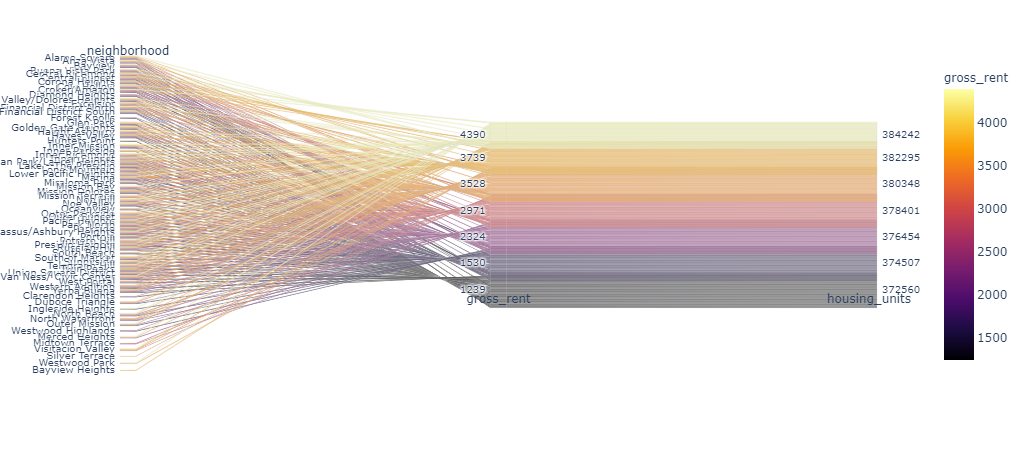

In [89]:
parallel_categories()

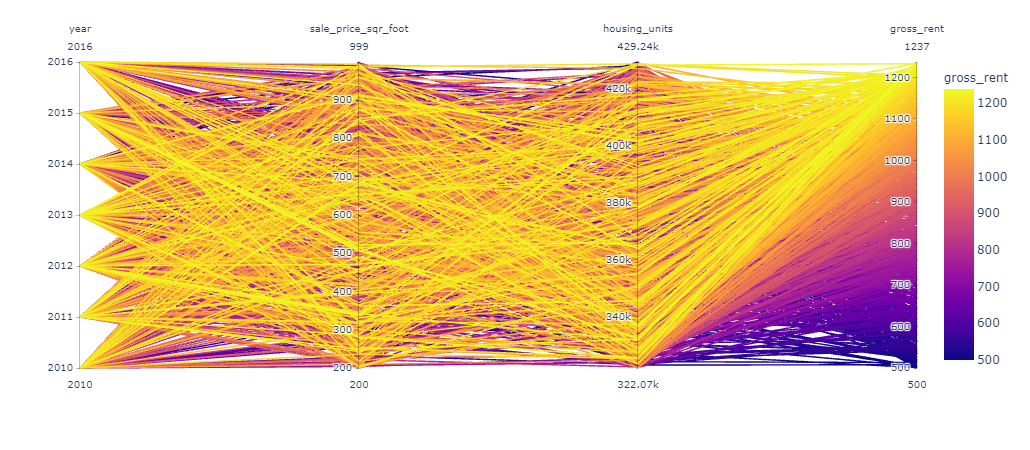

In [90]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
px.parallel_coordinates(df, color='gross_rent')

In [91]:
def neighborhood_map():
    """Neighborhood Map"""
    
neighborhood_map = px.scatter_mapbox(
    data_grp,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="Neighborhood Map",
    zoom=3,
    width=1000,
)

neighborhood_map_sale = data_grp.hvplot.scatter(
        y="gross_rent",
        title="Neighborhood Map",
       width=1000,
)  .opts(yformatter="%.0f")

In [92]:
pn.Row("## Neighborhood Map", neighborhood_map)

Row
    [0] Markdown(str)
    [1] Plotly(Figure)

In [93]:
pn.Row("## Neighborhood Map", neighborhood_map_sale)

Row
    [0] Markdown(str)
    [1] HoloViews(Scatter)

In [94]:
geo_row = pn.Row("## Neighborhood Map", neighborhood_map)
scatter_row = pn.Row(
    "## Neighborhood", neighborhood_map_sale
)

In [97]:
neighborhood_dashboard = pn.Tabs(
    (
        "Neighborhood Map",
        geo_row
    ),
    (
        "Neighborhood",
        scatter_row
    )
)

neighborhood_dashboard

Tabs
    [0] Row
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Row
        [0] Markdown(str)
        [1] HoloViews(Scatter)

In [98]:
neighborhood_dashboard.servable()

Tabs
    [0] Row
        [0] Markdown(str)
        [1] Plotly(Figure, relayout_data={'autosize': True})
    [1] Row
        [0] Markdown(str)
        [1] HoloViews(Scatter)